# DT iris 다중분류 (Multiclass Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 데이터 준비

In [3]:
X_train, X_test, y_train, y_test = my.get_iris()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [4]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### 학습

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=2022)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

### GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_leaf': range(1, 10), 
    'max_depth': range(3, 10),
    'min_samples_split': range(3, 10),
}

clf = DecisionTreeClassifier(random_state=2022)

gs = GridSearchCV(clf, params, cv=3, verbose=0)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': range(3, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(3, 10)})

In [11]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [12]:
gs.best_score_

0.9666666666666667

# 최종

In [21]:
clf = DecisionTreeClassifier(max_depth=3,
                             min_samples_leaf = 1,
                             min_samples_split=3,
                             random_state=2022)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=2022)

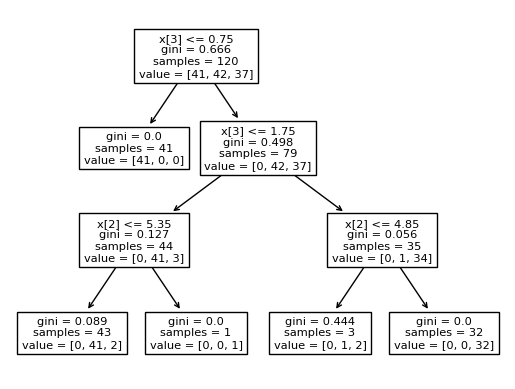

In [22]:
from sklearn.tree import plot_tree

plot_tree(clf)
plt.show()